# Plot theta estimations for the radar example

First generate the data with:
- `make exec_apf` to generate `radar_apf.log`
- `make exec_pf` to generate `radar_pf.log`

By default, the executable dumps 1000 samples for parameter `theta` every 10 steps for 50 steps.
You can adjust the number of steps with the `STEPS` variable of the Makefile.

The code is in `radar_apf.zls` (APF version) and `radar_pf.zls` (PF version).

### Boiler plate functions to import and load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from scipy.stats import gaussian_kde

In [2]:
def load_data(file):
    with open(file, 'r') as file:
        raw = '[' + file.read().replace('\n', ',') + ']'
        return eval(raw)

In [3]:
def heat(s, theta):
    x = np.array([x for x, _ in s])
    y = np.array([y for _, y in s])
    try:
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
        plt.scatter(x, y, c=z, cmap='Wistia') 
    except np.linalg.LinAlgError:
        z = [1.0]*len(x)
        plt.scatter(x, y, c='red')
    plt.scatter([theta[0]],[theta[1]], c='green', marker="x", s=100)

In [4]:
data_apf = load_data('radar_apf.log')
data_pf = load_data('radar_pf.log')
theta = [0.12, 0.25] # True value for theta 

### Plot APF results 

We use APF with moment matching and the following configuration:
- Filtering: 500 particles 
- Moment Matching: 200 particles
- Generate 200 output samples 

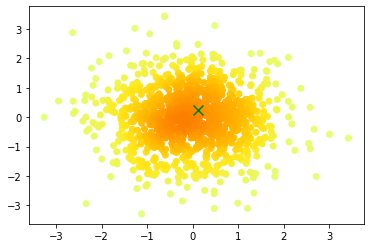

In [5]:
# at t=0
heat(data_apf[0], theta)

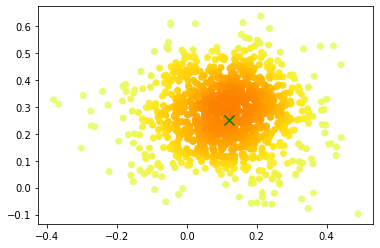

In [6]:
# at t = 30
heat(data_apf[3], theta) # at t=10

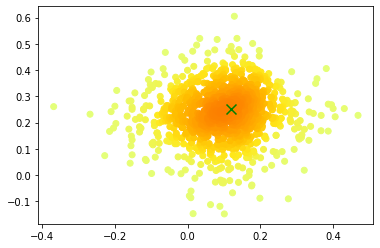

In [7]:
# at t=50

heat(data_apf[5], theta) # at t = 50

### Plot Particle Filter results

We use 100_000 particles to match the 500 * 200 particles of APF.

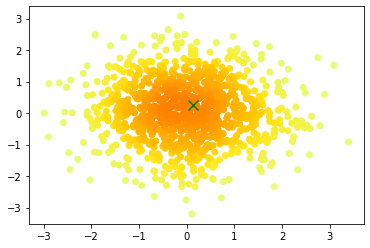

In [8]:
# at t=0
heat(data_pf[0], theta)

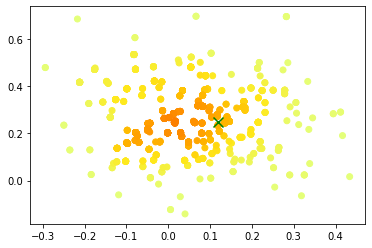

In [9]:
# at t = 30
heat(data_pf[3], theta) 

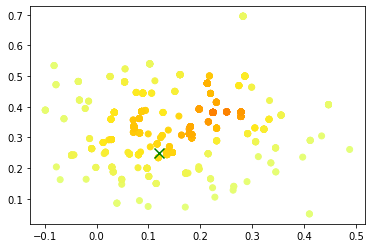

In [10]:
# at t=50
heat(data_pf[5], theta)